# Clasificación de Texto con Deep Learning

---
Maestría en Inteligencia Artificial

UNIR Universidad Internacional de la Rioja

Asignatura: Sistemas Cognitivos Artificiales

Actividad desarrollada por Edmilson Prata da Silva (edprata@gmail.com) en 09/02/26

Disponible en [GitHub](https://github.com/edprata/data-labs/tree/main/redes_neuronales_convolucionales_classificacion_textos)

---

## 💡 1. Introduccíon

En este notebook vamos a trabajar en clasificar textos utilizando Deep Learning. Se recorrerá todo el proceso desde traer el dataset hasta proceder a dicha clasificación. Durante la actividad se llevarán a cabo muchos procesos como la creación de un vocabulario, el uso de embeddings y la creación de modelos.

### 🏗 1.1. Base del Trabajo

El alcance deste trabajo está basada en un Notebook creado por François Chollet, uno de los creadores de Keras y autor del libro "Deep Learning with Python". También basado en una actividade de la Maestria en IA de UNIR Universidad Internacional de la Rioja.

### 🎯 1.2. Objetivo

El objetivo es presentar algunos de los conceptos que se trabajan para clasificación de textos utilizando Deep Learning y también presentar una implementación básica de las técnicas utilizadas:

- Tokenización;
- Vectorización;
- Creación del vocabulário;
- Embedding;
- Clasificación con Redes Neuronales Clásicas;
- Clasificación con Redes Neuronales Convolucionales (CNN);
- Clasificación con GloVe y CNN;
- Clasificación con Transformers.

### 🧮 1.3. Evaluación

La evaluación de los resultados es superficial porque la intención no es realizar ajustes y explorar las opciones avanzadas de estas técnicas, sino más bien presentar conceptos y realizar trabajos de clasificación utilizando diversas técnicas, allanando el camino para trabajos más avanzados. La comparación de las técnicas y el fine-tuning no hace parte de este trabajo.

## 📚 2. Librerías y Configuraciones

Librerias y configuraciones utilizadas en todo el notebook

In [1]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import TextVectorization

## 📥 3. Recopilación de Datos

En este Notebook se trabaja con el dataset "Newsgroup20" que contiene aproximadamente 20.000 mensajes que pertenecen a 20 categorías diferentes.

### 🗳 3.1. Download del Dataset

Download y almacenamiento local de los datos del dataset.

In [2]:
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

### 🏗 3.2. Estructura del Dataset

Visualización de la estructura de directorios del dataset

In [3]:
data_dir = pathlib.Path(data_path).parent / "news20_extracted/20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

Number of directories: 20
Directory names: ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']


### 🔍 3.3. Muestras de Archivos y Datos

Visualización de algunos archivos de la categoria "com.graphics".

In [4]:
fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in comp.graphics: 1000
Some example filenames: ['38254', '38402', '38630', '38865', '38891']


Ejemplo de un texto de la categoría "com.graphics"

In [5]:
print(open(data_dir / "comp.graphics" / "39625").read())

Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!newsserver.jvnc.net!castor.hahnemann.edu!hal.hahnemann.edu!brennan
From: brennan@hal.hahnemann.edu
Newsgroups: comp.graphics
Subject: .GIFs on a Tek401x ??
Date: 15 MAY 93 14:29:54 EST
Organization: Hahnemann University
Lines: 14
Message-ID: <15MAY93.14295461@hal.hahnemann.edu>
NNTP-Posting-Host: hal.hahnemann.edu


      I was skimming through a few gophers and bumped into one at NIH
   with a database that included images in .GIF format.  While I have
   not yet worked out the kinks of getting the gopher client to call
   an X viewer, I figure that the majority of the users here are not
   in an X11 environment - instead using DOS and MS-Kermit.

      With Kermit supporting Tek4010 emulation for graphics display,
   does anyone know of a package that would allow a Tek to display a
   .GIF image?  It would be of more use to the local population to
   plug something of this sort in as the 'picture' command in

Algunos archivos de la categoria "talk.politics.misc".

In [6]:
fnames = os.listdir(data_dir / "talk.politics.misc")
print("Number of files in talk.politics.misc:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of files in talk.politics.misc: 1000
Some example filenames: ['178529', '178971', '178985', '178340', '178516']


Ejemplo de un texto de la categoría "talk.politics.misc"

In [7]:
print(open(data_dir / "talk.politics.misc" / "178463").read())

Xref: cantaloupe.srv.cs.cmu.edu talk.politics.guns:54219 talk.politics.misc:178463
Newsgroups: talk.politics.guns,talk.politics.misc
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!darwin.sura.net!martha.utcc.utk.edu!FRANKENSTEIN.CE.UTK.EDU!VEAL
From: VEAL@utkvm1.utk.edu (David Veal)
Subject: Re: Proof of the Viability of Gun Control
Message-ID: <VEAL.749.735192116@utkvm1.utk.edu>
Lines: 21
Sender: usenet@martha.utcc.utk.edu (USENET News System)
Organization: University of Tennessee Division of Continuing Education
References: <1qpbqd$ntl@access.digex.net> <C5otvp.ItL@magpie.linknet.com>
Date: Mon, 19 Apr 1993 04:01:56 GMT

[alt.drugs and alt.conspiracy removed from newsgroups line.]

In article <C5otvp.ItL@magpie.linknet.com> neal@magpie.linknet.com (Neal) writes:

>   Once the National Guard has been called into federal service,
>it is under the command of the present. Tha N

### 🗳 3.4. Carga de Datos

Carga de datos obtenidos de la fuente externa Newsgroup20 y almacenados localmente.

In [8]:
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

# 🛠 4. Tratamiento de Datos

### ⚗️ 4.1. Mezcla de los datos

Mezclamos los datos antes de separarlos en entrenamiento y validación porque barajar (aleatorizar) asegura que los subconjuntos de entrenamiento y validación sean representativos del conjunto completo.

La mezcla de los datos evita sesgos ligados al orden de los datos y ayuda a que la distribución de clases sea similar entre ambos.

También previene que el modelo aprenda artefactos del orden (fuga de información) y que la evaluación sea optimista.

Al fijar una semilla (seed) la aleatorización es reproducible, lo que facilita comparar experimentos.

In [9]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

print("Number of training samples:", len(train_samples))

Number of training samples: 15998


### 🔪 4.2. Tokenización

Tokenización de las palabras con TextVectorization.

In [10]:
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

print(f"First 5 vocabulary items: {vectorizer.get_vocabulary()[:5]}")
print(f"Total vocabulary size: {len(vectorizer.get_vocabulary())}")

First 5 vocabulary items: ['', '[UNK]', np.str_('the'), np.str_('to'), np.str_('of')]
Total vocabulary size: 20000


2026-02-10 17:55:54.493899: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### 🔠 4.3. Construcción del Vocabulario

Informaciones al respecto de la construcción del vocabulario, al cual hemos limitado el número de tokens hasta 20.000.

In [11]:
# ¿Podrías indicar el número de token diferentes?
vectorizer2 = TextVectorization(max_tokens=22000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer2.adapt(text_ds)
vocabulary_size2 = len(vectorizer2.get_vocabulary())
print(f"\n¿Podrías indicar el número de token diferentes? {"si" if vocabulary_size2 == 22000 else "no, el número de tokens es " + str(vocabulary_size2)}")

# ¿Podrías indicar el tamaño del vocabulario sin limitar el número de tokens?
vectorizer3 = TextVectorization(output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer3.adapt(text_ds)
vocabulary_size3 = len(vectorizer3.get_vocabulary())
print(f"\n¿Podrías indicar el tamaño del vocabulario sin limitar el número de tokens? si, el tamaño del vocabulario es {vocabulary_size3}")

# ¿Cuántas palabras diferentes existen en los documentos procesados como instancias?
unique_tokens = set()
for sample in (train_samples + val_samples):
    tokens = sample.split()
    unique_tokens.update(tokens)

num_unique_tokens = len(unique_tokens)
print(f"\n¿Cuántas palabras diferentes existen en los documentos procesados como instancias? si, existen {num_unique_tokens} palabras diferentes")

2026-02-10 17:55:55.666971: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



¿Podrías indicar el número de token diferentes? si

¿Podrías indicar el tamaño del vocabulario sin limitar el número de tokens? si, el tamaño del vocabulario es 160575

¿Cuántas palabras diferentes existen en los documentos procesados como instancias? si, existen 375904 palabras diferentes


### 🔍 4.4. Salida de Vectorizer

Viendo la salida de Vectorizer.

In [12]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 3697, 1686,   15,    2, 5943])

In [13]:
output

<tf.Tensor: shape=(1, 200), dtype=int64, numpy=
array([[   2, 3697, 1686,   15,    2, 5943,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [14]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3697, 1686, 15, 2, 5943]

### 🪓 4.5. Tokenización de los datos de entrenamiento y validación

In [15]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

## 🔬 5. Clasificación con Redes Neuronales Clásicas

Creación del modelo con un embedding hecho a mano con redes neuronales clásicas.

### 👷‍♂️ 5.1. Arquitectura

Arquitectura de la red neuronal clásica.

In [16]:
modeloEmbeddingManual = keras.models.Sequential()
modeloEmbeddingManual.add(keras.layers.Embedding(20000, 10, input_length=200))
modeloEmbeddingManual.add(keras.layers.Flatten())
modeloEmbeddingManual.add(keras.layers.Dense(512, activation='relu'))
modeloEmbeddingManual.add(keras.layers.Dropout(0.3))
modeloEmbeddingManual.add(keras.layers.Dense(20, activation='softmax'))

/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### ⚙️ 5.2. Compilación

Compilación de la red neuronal clásica.

In [17]:
modeloEmbeddingManual.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
history = modeloEmbeddingManual.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))
print(modeloEmbeddingManual.summary())

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.1048 - loss: 2.8685 - val_acc: 0.1385 - val_loss: 2.7755
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.2553 - loss: 2.3220 - val_acc: 0.2673 - val_loss: 2.1763
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.4481 - loss: 1.7318 - val_acc: 0.3878 - val_loss: 1.7635
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6229 - loss: 1.2333 - val_acc: 0.5184 - val_loss: 1.4219
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7482 - loss: 0.8493 - val_acc: 0.5651 - val_loss: 1.2857
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8283 - loss: 0.5906 - val_acc: 0.5861 - val_loss: 1.2627
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8747 - loss: 0.4306 - val_acc: 0.6182 - val_loss: 1.1901
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9072 - loss: 0.3249 - val_acc: 0.6347 - val_loss: 1.1634
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - ac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 10)        │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,024,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,469,546 (9.42 MB)

 Trainable params: 1,234,772 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,234,774 (4.71 MB)

None


### 🧮 5.3. Evaluación

Evaluación de la red neuronal clásica.

#### 📈 5.3.1. Gráfico del Entrenamiento

Gráfico que contiene curvas de la métrica ACC y Loss del entrenamiento y también de la validación.

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - acc: 0.6454 - loss: 1.5502
ACC en el conjunto de test: 64.54%


Text(0.5, 1.0, 'Curvas de ACC')

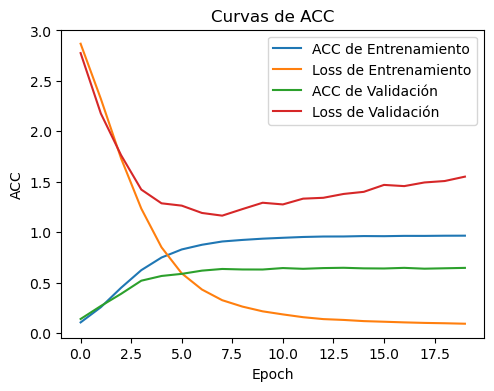

In [18]:
loss, acc = modeloEmbeddingManual.evaluate(x_val, y_val, verbose=1)
print(f"ACC en el conjunto de test: {acc*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='ACC de Entrenamiento')
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_acc'], label='ACC de Validación')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.legend()
plt.title('Curvas de ACC y Loss')

#### 🌡 5.3.2. Pruebas de Clasificación

Pruebas para ejemplos de clasificación com textos nuevos, fuera del conjunto de entrenamiento y validación.

In [19]:
string_input = keras.Input(shape=(1,), dtype="string")
vectorized = vectorizer(string_input)
preds = modeloEmbeddingManual(vectorized)
end_to_end_model = keras.Model(string_input, preds)

inp = tf.constant([["this message is about computer graphics and 3D modeling"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)

print(vectorized[0, :9])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
<KerasTensor shape=(9,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_9>
comp.graphics


In [20]:
inp = tf.constant([["we are talking about politics"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_10>
rec.motorcycles


In [21]:
inp = tf.constant([["we are talking about religion"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_11>
alt.atheism


# 🛠 6. Embedding con CNN

Creación del modelo con un embedding hecho a mano con redes neuronales convolucionales (CNN). Tiene sentido usar CNN en texto porque su estructura es muy eficaz para la extracción automática de características locales, como n-gramas, patrones de palabras o expresiones relevantes, de forma similar a cómo extraen bordes o formas en imágenes.

### 👷‍♀️ 6.1. Arquitectura

Arquitectura de la red CNN.

In [22]:
modeloEmbeddingManualConvolucionales = keras.models.Sequential()
modeloEmbeddingManualConvolucionales.add(keras.layers.Embedding(20000, 10, input_length=200))
modeloEmbeddingManualConvolucionales.add(keras.layers.Conv1D(128, 5, activation="relu"))
modeloEmbeddingManualConvolucionales.add(keras.layers.MaxPooling1D(5))
modeloEmbeddingManualConvolucionales.add(keras.layers.Conv1D(128, 5, activation="relu"))
modeloEmbeddingManualConvolucionales.add(keras.layers.MaxPooling1D(5))
modeloEmbeddingManualConvolucionales.add(keras.layers.Conv1D(128, 5, activation="relu"))
modeloEmbeddingManualConvolucionales.add(keras.layers.GlobalMaxPooling1D())
modeloEmbeddingManualConvolucionales.add(keras.layers.Dense(128, activation='relu'))
modeloEmbeddingManualConvolucionales.add(keras.layers.Dropout(0.3))
modeloEmbeddingManualConvolucionales.add(keras.layers.Dense(20, activation='softmax'))

### ⚙️ 6.2. Compilación

Compilación de la red CNN.

In [23]:
modeloEmbeddingManualConvolucionales.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
history = modeloEmbeddingManualConvolucionales.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))
print(modeloEmbeddingManualConvolucionales.summary())

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.0684 - loss: 2.9304 - val_acc: 0.1063 - val_loss: 2.7079
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.1173 - loss: 2.5718 - val_acc: 0.1438 - val_loss: 2.3696
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.1558 - loss: 2.3187 - val_acc: 0.1945 - val_loss: 2.1823
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.2167 - loss: 2.0950 - val_acc: 0.2613 - val_loss: 2.0014
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.2902 - loss: 1.8801 - val_acc: 0.3458 - val_loss: 1.8066
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.3765 - loss: 1.6475 - val_acc: 0.4374 - val_loss: 1.6013
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.4674 - loss: 1.4208 - val_acc: 0.4729 - val_loss: 1.4948
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.5396 - loss: 1.2411 - val_acc: 0.4834 - val_loss: 1.4941
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 10)        │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 35, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 128)         │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779,434 (2.97 MB)

 Trainable params: 389,716 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 389,718 (1.49 MB)

None


### 🧮 6.3. Evaluación

Evaluación de la red CNN.

#### 📈 6.3.1. Gráfico del Entrenamiento

Gráfico que contiene curvas de la métrica ACC y Loss del entrenamiento y también de la validación.

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - acc: 0.6454 - loss: 1.5502
ACC en el conjunto de test: 64.54%


Text(0.5, 1.0, 'Curvas de ACC')

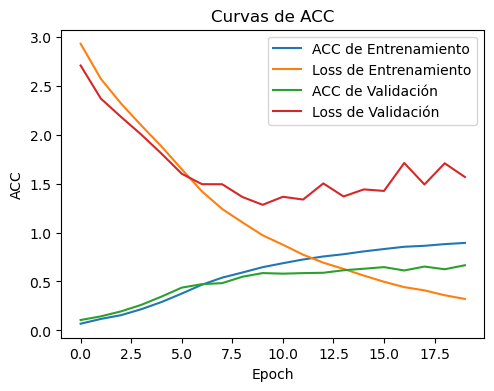

In [24]:
loss, acc = modeloEmbeddingManual.evaluate(x_val, y_val, verbose=1)
print(f"ACC en el conjunto de test: {acc*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='ACC de Entrenamiento')
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_acc'], label='ACC de Validación')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.legend()
plt.title('Curvas de ACC y Loss')

#### 🌡 6.3.2. Pruebas de Clasificación

Pruebas para ejemplo de clasificación com textos nuevos, fuera del conjunto de entrenamiento y validación.

In [25]:
string_input = keras.Input(shape=(1,), dtype="string")
vectorized = vectorizer(string_input)
preds = modeloEmbeddingManualConvolucionales(vectorized)
end_to_end_model = keras.Model(string_input, preds)

inp = tf.constant([["this message is about computer graphics and 3D modeling"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)

print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
comp.os.ms-windows.misc


In [26]:
inp = tf.constant([["we are talking about politics"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
comp.os.ms-windows.misc


In [27]:
inp = tf.constant([["we are talking about religion"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
soc.religion.christian


## 🛠 7. Embedding GloVe y CNN

Creación del modelo con el embedding GloVe y redes neuronales convolucionales.

### 👷‍♀️ 7.1. Download de GloVe

Download de Glove y almacenamiento local.

In [28]:
HOME = os.getenv('HOME')
glove_path = f"{HOME}/Downloads/glove.6B/"
glove_zip_file = f"{HOME}/Downloads/glove.6B.zip"

if not os.path.exists(glove_zip_file):
    !wget -O $HOME/Downloads/glove.6B.zip http://nlp.stanford.edu/data/glove.6B.zip
    print("GloVe embeddings downloaded.")
else:
    print("GloVe embeddings already downloaded.")

if not os.path.exists(glove_path):
    !unzip -qo $HOME/Downloads/glove.6B.zip -d $HOME/Downloads/glove.6B/
    print("GloVe embeddings extracted.")
else:
    print("GloVe embeddings already extracted.")


GloVe embeddings already downloaded.
GloVe embeddings already extracted.


### 📥 7.2. Carga de Glove

Carga de Glove almacenado localmente.

In [29]:
print("Loading GloVe word embeddings...")

path_to_glove_file = os.path.join(os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt")
path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = {}

with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Loading GloVe word embeddings...
Found 400000 word vectors.


### 🧅 7.3. Capa Embedding Keras

Creación de la capa Embedding de keras. Se trata de una matrux numpy donde el valor de cada posición corresponde con el vector pre-entreneado del vocabulario tras el vectorizer.

In [30]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print("Converted %d words (%d misses)" % (hits, misses))

Converted 17999 words (2001 misses)


### 📥 7.4. Carga del Embedding Keras

Carga del embedding como una capa keras. Al poner trainable=False nos quedamos con los valores del modelo pre-entrenado, es decir, no actualizamos estos valores a lo largo del entrenamiento.

In [31]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

### 👷‍♀️ 7.5. Arquitectura

Arquitectura de la red neuronal.

In [32]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
modelEmbeddingGloveConvolucionales = keras.Model(int_sequences_input, preds)
modelEmbeddingGloveConvolucionales.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, None, 100)      │     2,000,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, None, 128)      │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, None, 128)      │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, None, 128)      │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,247,516 (8.57 MB)

 Trainable params: 247,316 (966.08 KB)

 Non-trainable params: 2,000,200 (7.63 MB)

### ⚙️ 7.6. Compilación

Compilación de la red CNN.

In [33]:
modelEmbeddingGloveConvolucionales.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
history = modelEmbeddingGloveConvolucionales.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))
predictions = modelEmbeddingGloveConvolucionales.predict(x_val)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - acc: 0.1320 - loss: 2.6938 - val_acc: 0.2033 - val_loss: 2.2533
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.3200 - loss: 1.9558 - val_acc: 0.4221 - val_loss: 1.6615
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - acc: 0.4674 - loss: 1.5444 - val_acc: 0.5661 - val_loss: 1.3102
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.5497 - loss: 1.3040 - val_acc: 0.5876 - val_loss: 1.2450
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.6125 - loss: 1.1251 - val_acc: 0.6152 - val_loss: 1.1347
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.6536 - loss: 0.9996 - val_acc: 0.6212 - val_loss: 1.1533
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - acc: 0.6990 - loss: 0.8705 - val_acc: 0.6557 - val_loss: 1.0327
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - acc: 0.7267 - loss: 0.7804 - val_acc: 0.6534 - val_loss: 1.0211
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/

### 🧮 7.7. Evaluación

Evaluación de la red CNN.

#### 📈 7.7.1. Gráfico del Entrenamiento

Gráfico que contiene curvas de la métrica ACC y Loss del entrenamiento y también de la validación.

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6659 - loss: 1.6847
ACC en el conjunto de test: 66.59%


Text(0.5, 1.0, 'Curvas de ACC')

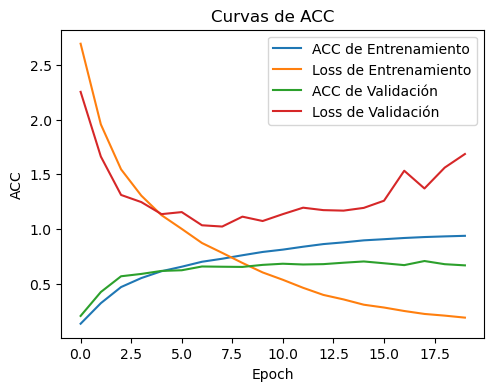

In [34]:
loss, acc = modelEmbeddingGloveConvolucionales.evaluate(x_val, y_val, verbose=1)
print(f"ACC en el conjunto de test: {acc*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='ACC de Entrenamiento')
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_acc'], label='ACC de Validación')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.legend()
plt.title('Curvas de ACC y Loss')

#### 🌡 7.7.2. Pruebas de Clasificación

Pruebas para ejemplo de clasificación com textos nuevos, fuera del conjunto de entrenamiento y validación.

In [35]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = modelEmbeddingGloveConvolucionales(x)
end_to_end_model = keras.Model(string_input, preds)

inp = tf.constant([["this message is about computer graphics and 3D modeling"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :9])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
<KerasTensor shape=(9,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_49>
comp.graphics


In [36]:
inp = tf.constant([["we are talking about politics"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_50>
comp.os.ms-windows.misc


In [37]:
inp = tf.constant([["we are talking about religion"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_51>
soc.religion.christian


# 🛠 8. Transformers

Clasificación utilizando la arquitectura Transformers. Creación del modelo con el embedding GloVe y Transformers.

Aunque es difícil hacer una afirmación de este tipo, ya que la casuística es muy elevada, puedese decir que, tecnicamente, las redes neuronales Transformers tienden a obtener mejor accuracy en base al ejemplo de este notebook porque:

- Procesan las entradas en paralelo, lo que permite modelar dependencias largas sin los problemas de las RNN.

- Usan mecanismos de atención, que capturan de forma explícita la relación entre palabras relevantes del texto, incluso cuando están alejadas entre sí.

### 👷‍♀️ 8.1. Arquitectura

Definición de la arquitectura de la red con modelo Transformers.

In [38]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
num_tokens = len(voc) + 2
maxlen = 200 
vocab_size = num_tokens

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

x = embedding_layer(inputs)
x = transformer_block(x, training=True)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

modeloEmbeddingGloveTransformers = keras.Model(inputs=inputs, outputs=outputs)

### ⚙️ 8.2. Compilación y Entrenamiento

Compilación y entrenamiento de la red con modelo Transformers.

In [39]:
modeloEmbeddingGloveTransformers.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
history = modeloEmbeddingGloveTransformers.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - acc: 0.0973 - loss: 2.8857 - val_acc: 0.1455 - val_loss: 2.7112
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - acc: 0.2004 - loss: 2.5281 - val_acc: 0.2753 - val_loss: 2.2627
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - acc: 0.2915 - loss: 2.1992 - val_acc: 0.2753 - val_loss: 2.1837
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - acc: 0.4377 - loss: 1.7654 - val_acc: 0.5764 - val_loss: 1.4325
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - acc: 0.6161 - loss: 1.2011 - val_acc: 0.6847 - val_loss: 1.0467
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - acc: 0.7258 - loss: 0.8720 - val_acc: 0.7499 - val_loss: 0.8170
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - acc: 0.7965 - loss: 0.6560 - val_acc: 0.7724 - val_loss: 0.7558
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - acc: 0.8449 - loss: 0.5084 - val_acc: 0.7779 - val_loss: 0.7499
Epoch 9/20
125/125 ━━━━━━━━━━━━━

### 🧮 8.3. Evaluación

Evaluación de la red con modelo Transformers.

#### 📈 8.3.1. Gráfico del Entrenamiento

Gráfico que contiene curvas de la métrica ACC y Loss del entrenamiento y también de la validación.

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.7987 - loss: 1.2252
ACC en el conjunto de test: 79.87%


Text(0.5, 1.0, 'Curvas de ACC y Loss')

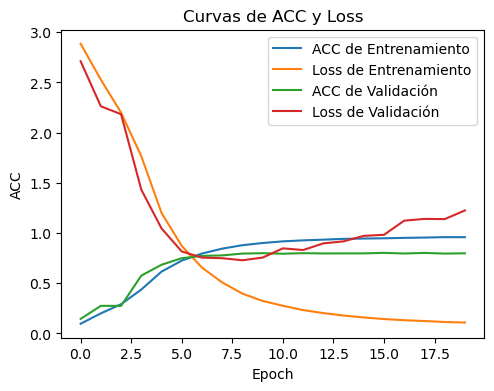

In [40]:
loss, acc = modeloEmbeddingGloveTransformers.evaluate(x_val, y_val, verbose=1)
print(f"ACC en el conjunto de test: {acc*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='ACC de Entrenamiento')
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_acc'], label='ACC de Validación')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.legend()
plt.title('Curvas de ACC y Loss')

#### 🌡 8.3.2. Pruebas de Clasificación

Pruebas para ejemplo de clasificación com textos nuevos, fuera del conjunto de entrenamiento y validación.

In [41]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = modeloEmbeddingGloveTransformers(x)
end_to_end_model = keras.Model(string_input, preds)

inp = tf.constant([["this message is about computer graphics and 3D modeling"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_68>
comp.graphics


In [42]:
inp = tf.constant([["politics and federal courts law that people understand with politician and elects congressman"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_69>
talk.politics.guns


In [43]:
inp = tf.constant([["we are talking about religion"]], dtype=tf.string)
probabilities = end_to_end_model.predict(inp)
print(vectorized[0, :5])
print(class_names[np.argmax(probabilities[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
<KerasTensor shape=(5,), dtype=int64, sparse=False, ragged=False, name=keras_tensor_70>
alt.atheism
